# Recommendation

We found that in the stacking model, the features identified as important are exactly the ones described in the feature engineering section. These can be grouped into two categories: address-related features and the physical characteristics of properties.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## address-related features

In [14]:
rental_df_selected_train = pd.read_csv('../../data/rental_df_selected_train.csv')

#rental_df_selected_train.head()

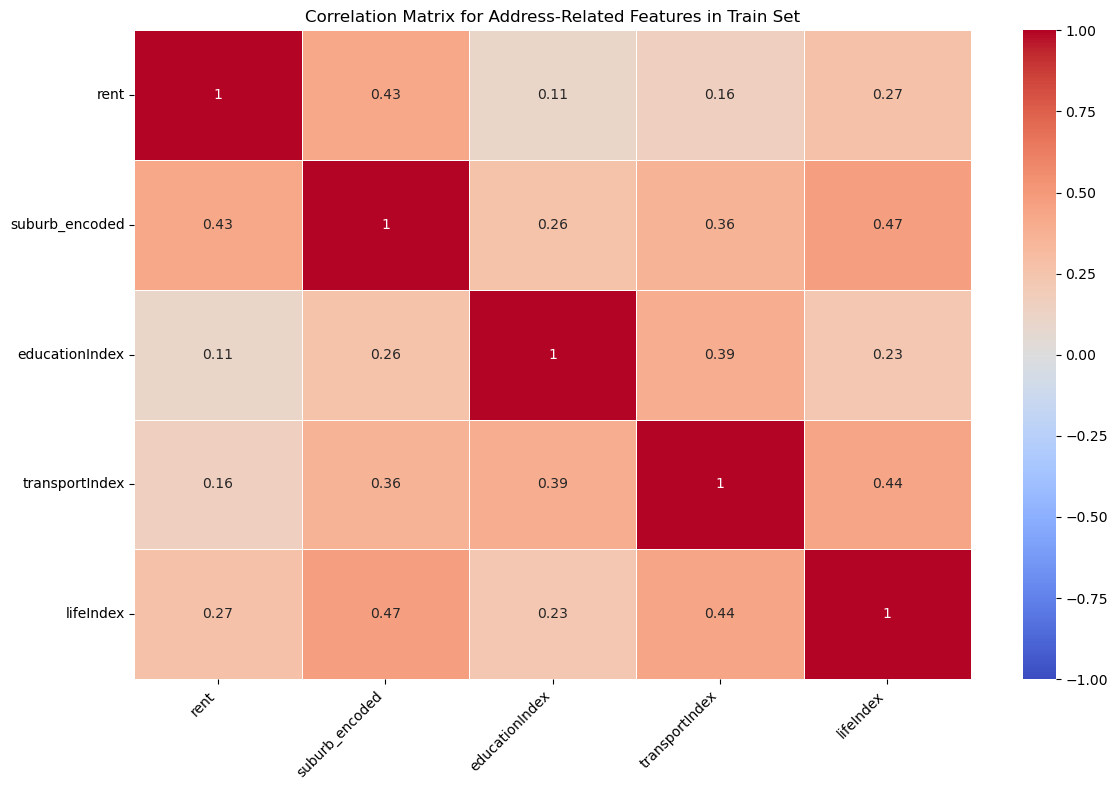

In [15]:
ADDRESS_RELATED = ['rent', 'suburb_encoded', 'educationIndex', 'transportIndex', 'lifeIndex']

# Compute the correlation matrix for rental_df_selected_train
corr_matrix = rental_df_selected_train[ADDRESS_RELATED].corr()

plt.figure(figsize=(12, 8))

# Generate a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Step 4: Add title and labels
plt.title('Correlation Matrix for Address-Related Features in Train Set')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Step 5: Display the plot
plt.tight_layout()
plt.show()

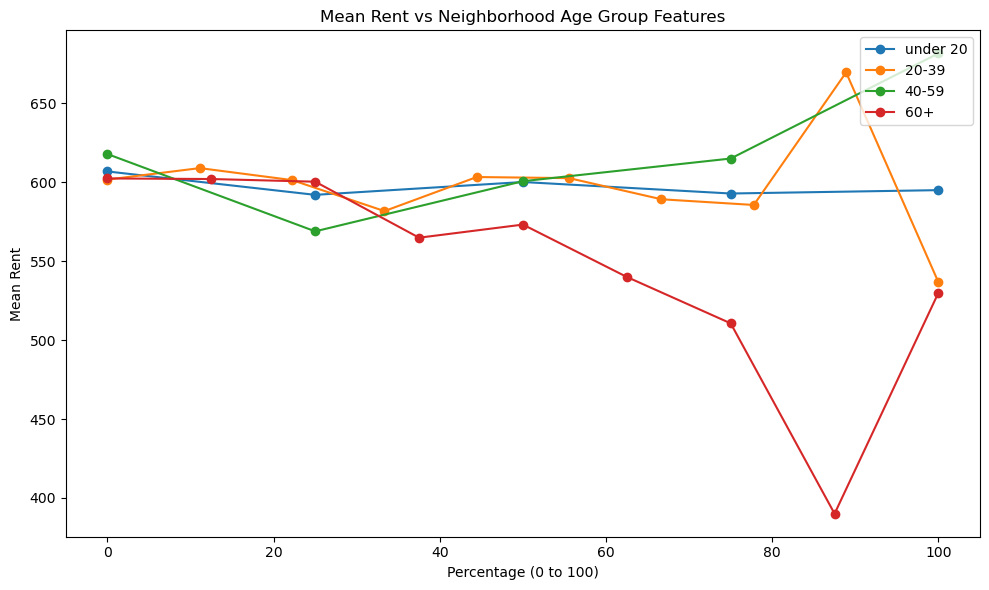

In [35]:
# List of age group features (adjust based on your actual column names)
age_group_columns = ['under 20', '20-39', '40-59', '60+']  # Example age group columns

# Number of bins to divide the percentage (0 to 100) into
num_bins = 10

# Step 1: Check if the required columns exist in the dataset
if all(col in rental_df_selected_train.columns for col in age_group_columns + ['rent']):
    
    # Step 2: Create a list to store bin edges for each age group (0 to 100)
    bin_edges = np.linspace(0, 100, num_bins + 1)
    
    # Step 3: Initialize lists to store smoothed mean rent values for each age group
    rent_means_by_age_group = {}

    # Step 4: Calculate the mean rent for each percentage bin for each age group
    for age_group in age_group_columns:
        # Bin the age group feature
        rental_df_selected_train[f'{age_group}_binned'] = pd.cut(rental_df_selected_train[age_group], bins=bin_edges, labels=False)
        
        # Calculate mean rent per bin, dropping NaN values
        rent_means_by_age_group[age_group] = rental_df_selected_train.groupby(f'{age_group}_binned')['rent'].mean().dropna()

    # Step 5: Plot the smoothed rent for each age group
    plt.figure(figsize=(10, 6))

    # Plot the smoothed rent means for each age group
    for age_group, rent_means in rent_means_by_age_group.items():
        bin_centers = np.linspace(0, 100, len(rent_means))  # Adjust x-axis to match available data
        plt.plot(bin_centers, rent_means.values, label=f'{age_group}', marker='o', linestyle='-')

    # Step 6: Add labels and title
    plt.xlabel('Percentage (0 to 100)')
    plt.ylabel('Mean Rent')
    plt.title('Mean Rent vs Neighborhood Age Group Features')

    # Step 7: Add a legend
    plt.legend(loc='upper right')

    # Step 8: Save the plot
    plt.tight_layout()
    plt.savefig('../../plots/age_group_rent_plot.png')

    # Show the plot
    plt.show()

else:
    print("One or more required columns are missing in the dataset.")


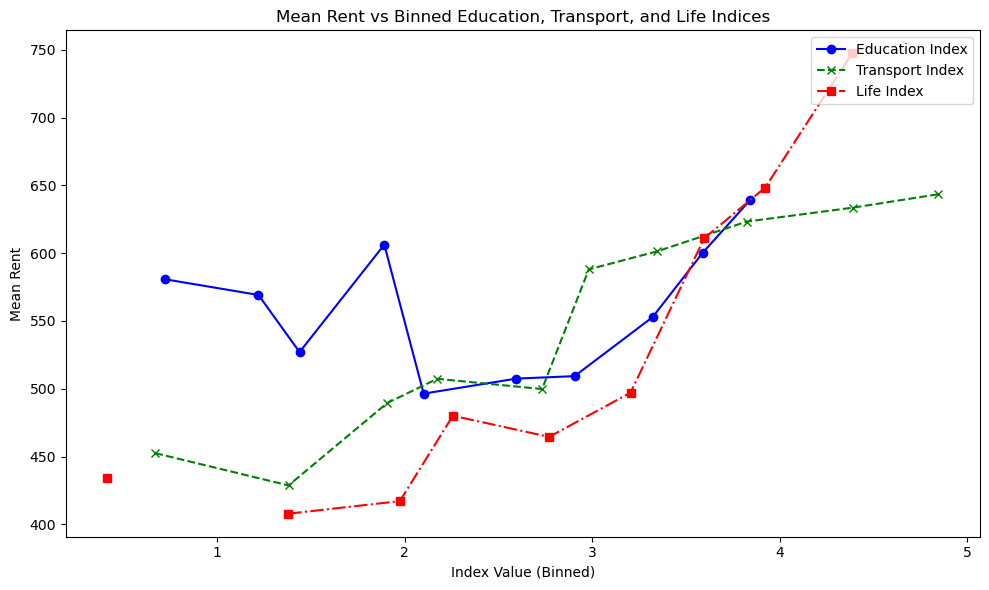

In [26]:
# Function to bin the data and calculate the mean for each bin
def calculate_binned_means(df, column, target, bins=10):
    binned = pd.cut(df[column], bins=bins)
    binned_means = df.groupby(binned)[[column, target]].mean()
    return binned_means[column], binned_means[target]

# Step 1: Check if the required columns exist in the dataset
required_columns = ['educationIndex', 'transportIndex', 'lifeIndex', 'rent']

if all(col in rental_df_selected_train.columns for col in required_columns):
    
    # Step 2: Define the number of bins (intervals)
    num_bins = 10
    
    # Step 3: Calculate binned means for each index
    education_bins, rent_means_education = calculate_binned_means(rental_df_selected_train, 'educationIndex', 'rent', bins=num_bins)
    transport_bins, rent_means_transport = calculate_binned_means(rental_df_selected_train, 'transportIndex', 'rent', bins=num_bins)
    life_bins, rent_means_life = calculate_binned_means(rental_df_selected_train, 'lifeIndex', 'rent', bins=num_bins)

    # Step 4: Plot the binned means for each index against rent
    plt.figure(figsize=(10, 6))

    # Plot binned means for educationIndex
    plt.plot(education_bins, rent_means_education, label='Education Index', color='blue', marker='o', linestyle='-')

    # Plot binned means for transportIndex
    plt.plot(transport_bins, rent_means_transport, label='Transport Index', color='green', marker='x', linestyle='--')

    # Plot binned means for lifeIndex
    plt.plot(life_bins, rent_means_life, label='Life Index', color='red', marker='s', linestyle='-.')

    # Step 5: Add labels and title
    plt.xlabel('Index Value (Binned)')
    plt.ylabel('Mean Rent')
    plt.title('Mean Rent vs Binned Education, Transport, and Life Indices')

    # Step 6: Add a legend
    plt.legend(loc='upper right')

    # Step 7: Save the plot
    plt.tight_layout()
    plt.savefig('../../plots/rent_vs_binned_indices.png')

    # Show the plot
    plt.show()

## physical characteristics of properties

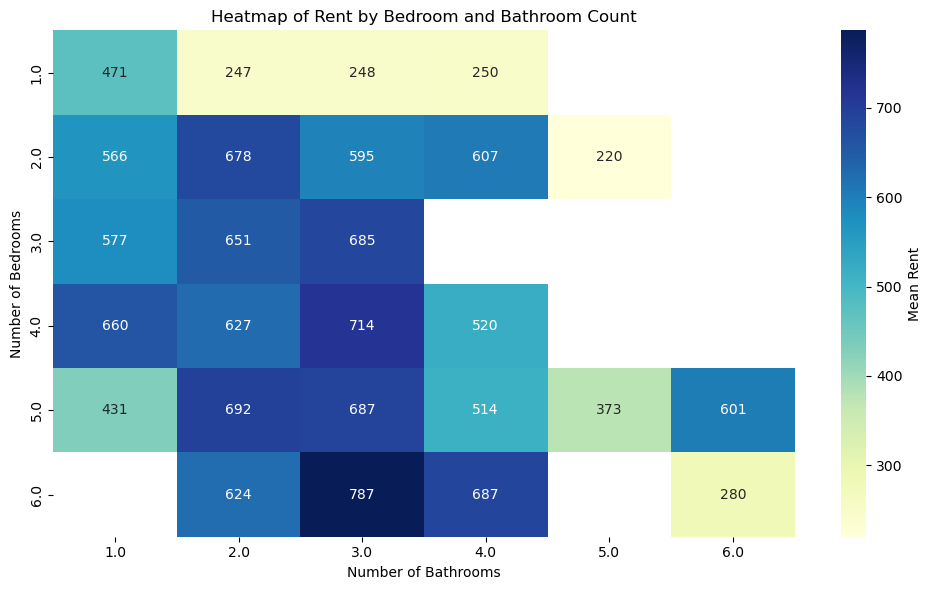

In [36]:
if all(col in rental_df_selected_train.columns for col in ['bedroom', 'bathroom', 'rent']):
    
    # Step 2: Create a pivot table for the heatmap
    pivot_table = rental_df_selected_train.pivot_table(values='rent', 
                                                       index='bedroom', 
                                                       columns='bathroom', 
                                                       aggfunc=np.mean)

    # Step 3: Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Mean Rent'})

    # Step 4: Add labels and title
    plt.title('Heatmap of Rent by Bedroom and Bathroom Count')
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Number of Bedrooms')

    # Step 5: Save the heatmap plot
    plt.tight_layout()
    plt.savefig('../../plots/bedroom_bathroom_rent_heatmap.png')

    # Show the heatmap
    plt.show()

else:
    print("One or more required columns are missing in the dataset.")

In [40]:
rental_df_train_raw = pd.read_csv('../../data/raw/rental_df_train_raw.csv')

# Step 1: Ensure 'propertyFeatures' and 'rent' columns exist in the dataset
if 'propertyFeatures' in rental_df_train_raw.columns and 'rent' in rental_df_train_raw.columns:
    
    # Step 2: Split the 'propertyFeatures' column into individual features (assumed to be comma-separated)
    rental_df_train_raw['propertyFeatures_split'] = rental_df_train_raw['propertyFeatures'].str.split(',')

    # Step 3: Explode the DataFrame to create one row per feature
    rental_exploded = rental_df_train_raw.explode('propertyFeatures_split')

    # Step 4: Group by the individual features and calculate the mean rent
    feature_rent_mean = rental_exploded.groupby('propertyFeatures_split')['rent'].mean()

    # Step 5: Sort the features by the highest mean rent
    feature_rent_mean_sorted = feature_rent_mean.sort_values(ascending=False)

    # Step 6: Print the top property features with the highest average rent
    print("Top Property Features by Highest Average Rent:")
    print(feature_rent_mean_sorted.head(10))

else:
    print("Required columns 'propertyFeatures' and/or 'rent' are missing in the dataset.")

Top Property Features by Highest Average Rent:
propertyFeatures_split
Theatre Room                       1200.0
Pool/Spa Count: 1                  1150.0
Beach/Coastal Property             1045.0
100 meters to Sandringham Beach     990.0
automatics front gates              990.0
Water Front                         985.0
Private spa on balcony              975.0
Granny flat or home office          950.0
Bush Retreat                        945.0
close to scho                       925.0
Name: rent, dtype: float64


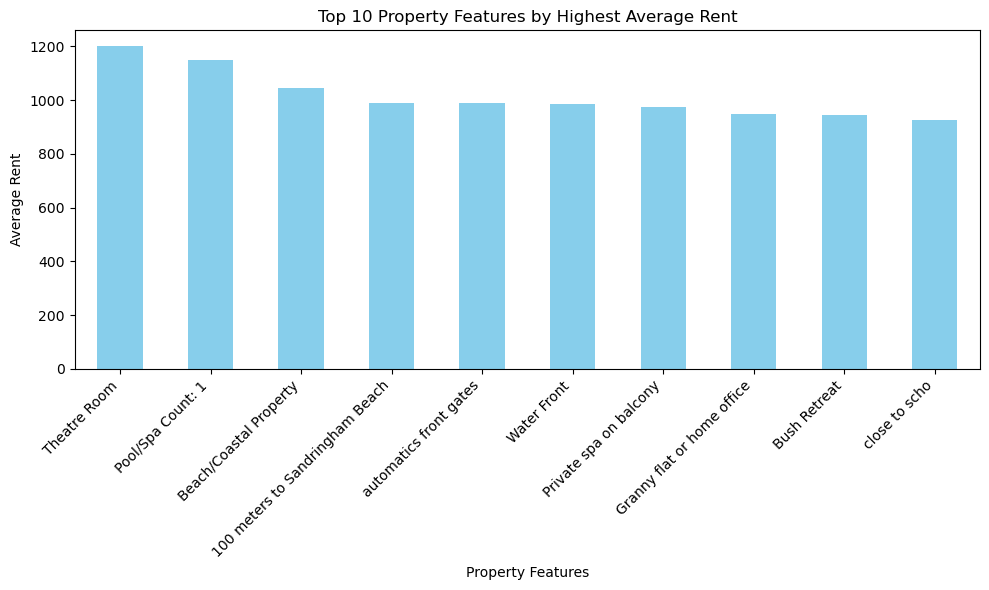

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
rental_df_train_raw = pd.read_csv('../../data/raw/rental_df_train_raw.csv')

# Step 1: Ensure 'propertyFeatures' and 'rent' columns exist in the dataset
if 'propertyFeatures' in rental_df_train_raw.columns and 'rent' in rental_df_train_raw.columns:
    
    # Step 2: Split the 'propertyFeatures' column into individual features (assumed to be comma-separated)
    rental_df_train_raw['propertyFeatures_split'] = rental_df_train_raw['propertyFeatures'].str.split(',')

    # Step 3: Explode the DataFrame to create one row per feature
    rental_exploded = rental_df_train_raw.explode('propertyFeatures_split')

    # Step 4: Group by the individual features and calculate the mean rent
    feature_rent_mean = rental_exploded.groupby('propertyFeatures_split')['rent'].mean()

    # Step 5: Sort the features by the highest mean rent
    feature_rent_mean_sorted = feature_rent_mean.sort_values(ascending=False)

    # Step 6: Select the top 10 property features with the highest average rent
    top_features = feature_rent_mean_sorted.head(10)

    # Step 7: Plot the top property features and their average rent as a bar chart
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar', color='skyblue')

    # Add labels and title to the plot
    plt.xlabel('Property Features')
    plt.ylabel('Average Rent')
    plt.title('Top 10 Property Features by Highest Average Rent')
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.savefig('../../plots/top_property_features_by_rent.png')
    plt.show()

else:
    print("Required columns 'propertyFeatures' and/or 'rent' are missing in the dataset.")